<a href="https://colab.research.google.com/github/Nabakindagrace/gracenabakinda_codes/blob/main/Nabakinda_Grace_Take_Home_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import needed libraries
import pandas as pd # We import pandas because it is a core Python library used for working with data tables. It offers powerful and flexible tools for data manipulation and analysis.

In [ ]:
# UPLOADING DATASET
data = pd.read_excel('literacy_rates_updated.xlsx')
data

,Region,Country,Year,Age,Gender,Literacy rate
0,Central and Southern Asia,Afghanistan,2011,<15,female,0.176121
1,Central and Southern Asia,Afghanistan,2011,<15,male,0.454171
2,NaN,Afghanistan,2011,15-24,female,0.321132
3,NaN,Afghanistan,2011,15-24,male,0.618791
4,Central and Southern Asia,Afghanistan,2011,25-64,female,0.084128
...,...,...,...,...,...,...
3308,Sub-Saharan Africa,Zimbabwe,3014,15-24,male,0.875919
3309,Sub-Saharan Africa,Zimbabwe,2014,25-64,female,0.880485
3310,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.897255
3311,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.734258


# **DATA CLEANING**

**1. Identify and Adress any duplicate values.**

In [ ]:
data.info() # To get a quick overview of the dataframe



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3309 non-null   object 
 1   Country        3313 non-null   object 
 2   Year           3313 non-null   object 
 3   Age            3313 non-null   object 
 4   Gender         3313 non-null   object 
 5   Literacy rate  3308 non-null   float64
dtypes: float64(1), object(5)
memory usage: 155.4+ KB


In [ ]:
# Checking for duplicated data
duplicated_rows = data.duplicated()
data[duplicated_rows]

,Region,Country,Year,Age,Gender,Literacy rate
18,Central and Southern Asia,Bangladesh,2011,15-24,female,0.795445
39,Central and Southern Asia,Bangladesh,2013,65+,female,0.153041
167,Central and Southern Asia,Maldives,2014,25-64,male,0.989056
347,Eastern and South-Eastern Asia,China,2010,<15,female,0.927112
513,Eastern and South-Eastern Asia,Singapore,2013,<15,male,0.985425
763,Europe and Northern America,Portugal,2018,25-64,female,0.987342
1158,Latin America and the Caribbean,Colombia,2010,15-24,female,0.985172
1279,Latin America and the Caribbean,Dominican Republic,2016,15-24,female,0.988674
1558,Latin America and the Caribbean,Mexico,2013,<15,female,0.929039
2030,Northern Africa and Western Asia,Egypt,2013,65+,male,0.571875


In [ ]:

print(data.duplicated().sum())# Count the duplicates

10


In [ ]:

data = data.drop_duplicates()# Remove duplicates


In [ ]:
data.duplicated().sum()#check for duplicates again

np.int64(0)

**2. Checking for data types.**
This helps to ensure that all columns match the data types listed in the data dictionary


In [ ]:
data.dtypes

,0
Region,object
Country,object
Year,object
Age,object
Gender,object
Literacy rate,float64


From the output above, it was observed that the Year column is of type object, yet according to the data dictionary, it is supposed to be of type integer (int).

**3. Identify and address any missing values in this dataset.**

In [ ]:
data.isna()# Identify if a value is null or not

,Region,Country,Year,Age,Gender,Literacy rate
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
3308,False,False,False,False,False,False
3309,False,False,False,False,False,False
3310,False,False,False,False,False,False
3311,False,False,False,False,False,False


In [ ]:
# This will provide the total number of null values (True) for each column
null_sums = data.isna().sum()
null_sums

,0
Region,4
Country,0
Year,0
Age,0
Gender,0
Literacy rate,5


In [ ]:
# Get the % of null values
null_percent = null_sums/len(data) * 100
null_percent

,0
Region,0.121102
Country,0.000000
Year,0.000000
Age,0.000000
Gender,0.000000
Literacy rate,0.151378


Filling in missing values with a placeholder appropriate for the data type.


In [ ]:
# For categorical variable(Region)
data['Region']= data['Region'].fillna("MISSED") #replaces all missing (null) entries with the placeholder string "MISSED".
data['Region'].value_counts()

/tmp/ipython-input-19-3335449797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Region']= data['Region'].fillna("MISSED")


,count
Region,
Latin America and the Caribbean,940
Sub-Saharan Africa,770
Northern Africa and Western Asia,568
Europe and Northern America,336
Central and Southern Asia,307
Eastern and South-Eastern Asia,282
Oceania,96
MISSED,4


In [ ]:
#For numerical variable(Literacy rate)

data['Literacy rate'].describe()# Obtain summary statistics for the Literacy rate

,Literacy rate
count,3298.000000
mean,0.817307
std,0.235048
min,0.004025
25%,0.726583
50%,0.929605
75%,0.985496
max,1.000000


In [ ]:
# Filling null values with -1 since literacy rates range from 0 to 1, using -1 makes it obvious that the value is not valid or missing.
data['Literacy rate']  = data['Literacy rate'].fillna(-1)
data['Literacy rate'].isna().sum()

/tmp/ipython-input-21-2971165664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Literacy rate']  = data['Literacy rate'].fillna(-1)


np.int64(0)

In [ ]:
data.info() #Checking your data again to see whether all missing values are addressed

<class 'pandas.core.frame.DataFrame'>
Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3303 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   object 
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3303 non-null   float64
dtypes: float64(1), object(5)
memory usage: 180.6+ KB


**4. Identify and address any inappropriate or unusual data points.**


In [ ]:
#Identify any inconsistent entries
for col in ['Region', 'Country', 'Year', 'Age', 'Gender', 'Literacy rate']:
  print(f"Unique values in {col}:")
  print(data[col].unique())

Unique values in Region:
['Central and Southern Asia' 'MISSED' 'Eastern and South-Eastern Asia'
 'Europe and Northern America' 'Latin America and the Caribbean'
 'Northern Africa and Western Asia' 'Oceania' 'Sub-Saharan Africa']
Unique values in Country:
['Afghanistan' 'Bangladesh' 'Bhutan' 'India' 'Iran (Islamic Republic of)'
 'Kazakhstan' 'Kyrgyzstan' 'Maldives' 'Nepal' 'Pakistan' 'Sri Lanka'
 'Tajikistan' 'Turkmenistan' 'Uzbekistan' 'Brunei Darussalam' 'Cambodia'
 'China' 'China, Macao Special Administrative Region' 'Indonesia'
 "Lao People's Democratic Republic" 'Malaysia' 'Mongolia' 'Myanmar'
 'Philippines' 'Singapore' 'Thailand' 'Timor-Leste' 'Viet Nam' 'Albania'
 'Belarus' 'Bosnia and Herzegovina' 'Bulgaria' 'Croatia' 'Estonia'
 'Greece' 'Hungary' 'Italy' 'Latvia' 'Lithuania' 'Malta' 'Montenegro'
 'Portugal' 'Republic of Moldova' 'Romania' 'Russian Federation'
 'San Marino' 'Serbia' 'Slovenia' 'Spain'
 'The former Yugoslav Republic of Macedonia' 'Ukraine'
 'Antigua and Barbuda' 

From the output above, a typo in the Year column was observed — one of the entries has the value 3014, which is clearly an error and falls outside the expected range of years.

Inconsistencies in the Gender column were also observed, with values such as 'F', 'M', 'female', and 'male'. These variations should be standardized to ensure consistency in the data

In [ ]:
# Convert Year to numeric and fix data type issues
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

/tmp/ipython-input-27-2871789951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = pd.to_numeric(data['Year'], errors='coerce')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3303 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3302 non-null   float64
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3303 non-null   float64
dtypes: float64(2), object(4)
memory usage: 180.6+ KB


In [ ]:
# Fix invalid years (e.g., Year > 2025) by setting them as NaN
data.loc[data['Year'] > 2025, 'Year'] = pd.NA

In [ ]:
# Fill missing Year with placeholder
data['Year'] = data['Year'].fillna(-1)#Replacing NaN with -1 ot ensure that the column is numerically complete.

/tmp/ipython-input-31-1603066703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Year'].fillna(-1)


In [ ]:
data['Year']=data['Year'].astype(int) # Coverting the data type to int

/tmp/ipython-input-33-1620306230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year']=data['Year'].astype(int) # Coverting the data type to int


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3303 entries, 0 to 3312
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         3303 non-null   object 
 1   Country        3303 non-null   object 
 2   Year           3303 non-null   int64  
 3   Age            3303 non-null   object 
 4   Gender         3303 non-null   object 
 5   Literacy rate  3303 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.6+ KB


In [ ]:
# Standardize Gender values
data['Gender'] = data['Gender'].replace({'F': 'female', 'M': 'male'})

/tmp/ipython-input-35-1254567559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].replace({'F': 'female', 'M': 'male'})


In [ ]:
data['Gender'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
# Ensure Age and Gender are treated as categorical
data['Age'] = data['Age'].astype('category')
data['Gender'] = data['Gender'].astype('category') #This helps to ensure that pandas handles Age and Gender as qualitative variables, optimizing memory, improving performance, and ensuring correct analytical behavio

/tmp/ipython-input-39-3221412437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].astype('category')
/tmp/ipython-input-39-3221412437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = data['Gender'].astype('category')


In [ ]:
# Save the cleaned file
data.to_excel("literacy_rates_cleaned.xlsx", index=False)

## **DATA VISUALIZATIONS.**

In [ ]:
#Import needed libraries
import matplotlib.pyplot as plt #matplotlib is a foundational plotting library for python that provides a flexible way to create custom plots.
import seaborn as sns #seaborn is a library that simplifies the creation of statistically meaningful plots with beautiful and informative default styles.

1. **Two different types of univariate exploratory visualizations**.

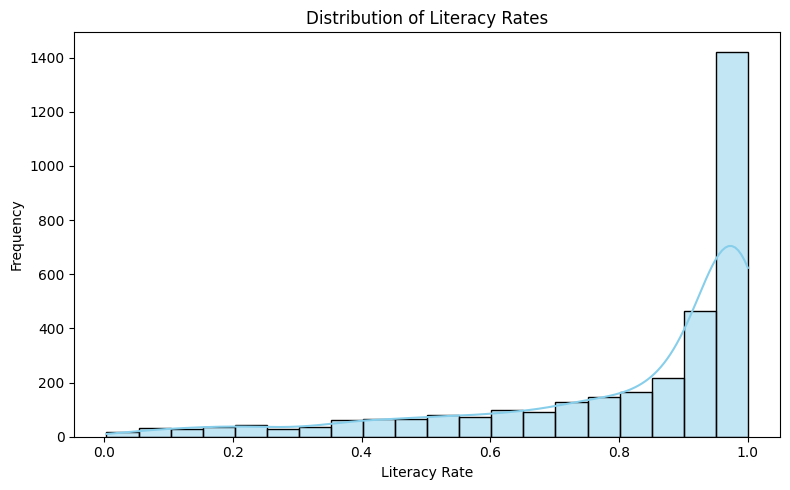

In [ ]:
# 1. Histogram of Literacy Rates
plt.figure(figsize=(8, 5))
sns.histplot(data=data[data['Literacy rate'] >= 0], x='Literacy rate', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Literacy Rates')
plt.xlabel('Literacy Rate')
plt.ylabel('Frequency')
plt.tight_layout()# prevents overlap
plt.show()

The histogram above shows that most literacy rates are skewed toward higher values, indicating generally high literacy levels among the populations represented in the dataset. This suggests that a significant portion of the countries or regions included have achieved relatively high literacy rates.

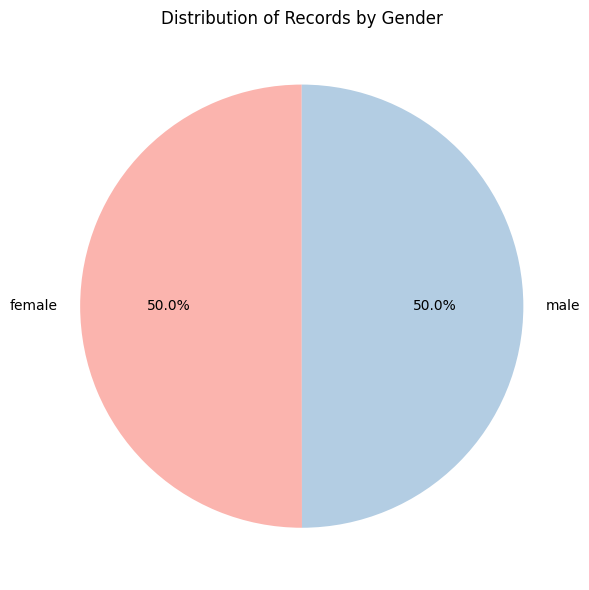

In [ ]:
# Pie chart showing Gender distribution.
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Records by Gender')
plt.axis('equal')  # Ensures the pie is a perfect circle
plt.tight_layout()
plt.show()

The pie chart above shows that the dataset contains a relatively balanced number of male and female entries.

In [ ]:
gender_counts

,count
Gender,
female,1652
male,1651


2. **Two different types of multivariate exploratory visualizations**

/tmp/ipython-input-48-11208137.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data[data['Literacy rate'] >= 0], x='Age', y='Literacy rate', palette='Set3')


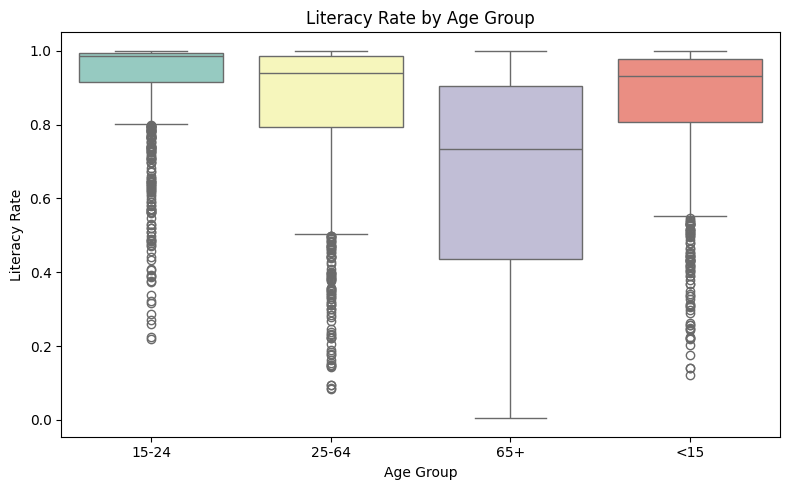

In [ ]:
# The boxplot illustrating how literacy rates vary by age group.
plt.figure(figsize=(8, 5))
sns.boxplot(data=data[data['Literacy rate'] >= 0], x='Age', y='Literacy rate', palette='Set3')
plt.title('Literacy Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Literacy Rate')
plt.tight_layout()
plt.show()

The boxplot shows that literacy rates are generally high among the 15–24 and 25–64 age groups, with medians close to 1.0 and relatively narrow distributions, indicating consistent access to education among youth and working-age adults. In contrast, the 65+ age group has a noticeably lower median and a wider spread of values, reflecting significant variability and limited access to education in older generations. The <15 group also exhibits a high median literacy rate but with more variability and several low outliers, possibly due to differences in early education exposure. Overall, the plot highlights generational differences in literacy, with younger age groups demonstrating better literacy outcomes.

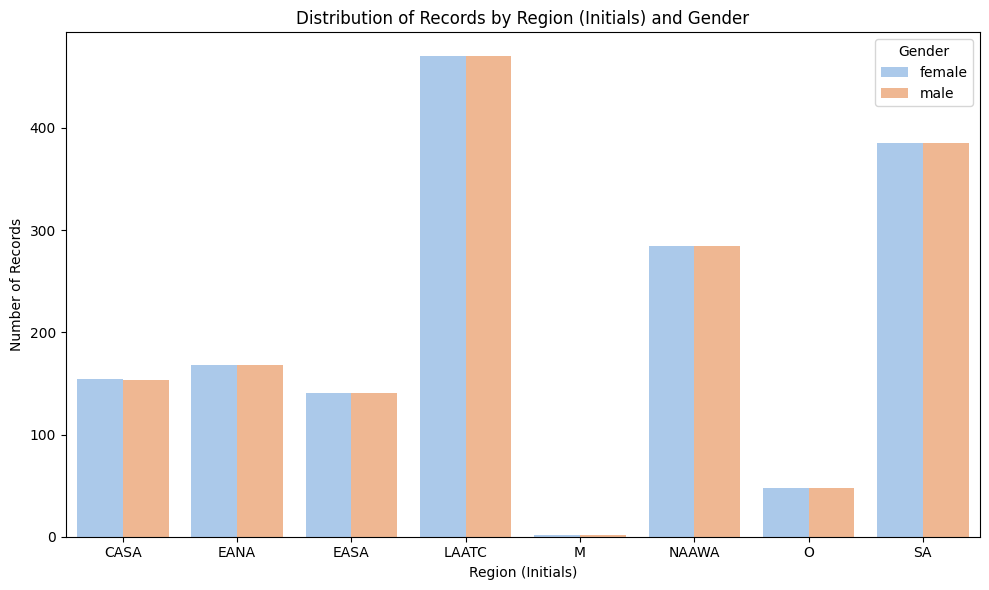

Region Initials Key:
CASA = Central and Southern Asia
EANA = Europe and Northern America
EASA = Eastern and South-Eastern Asia
LAATC = Latin America and the Caribbean
M = MISSED
NAAWA = Northern Africa and Western Asia
O = Oceania
SA = Sub-Saharan Africa


In [ ]:
# Plot the of grouped bar chart showing the distribution by Region and Gender


def get_initials(region):# Create a mapping from region name to initials
    return ''.join([word[0].upper() for word in str(region).split()])

data['Region Initials'] = data['Region'].apply(get_initials)

group_counts = data.groupby(['Region Initials', 'Gender']).size().reset_index(name='Count')


plt.figure(figsize=(10, 6))
sns.barplot(data=group_counts, x='Region Initials', y='Count', hue='Gender', palette='pastel')
plt.title('Distribution of Records by Region (Initials) and Gender')
plt.xlabel('Region (Initials)')
plt.ylabel('Number of Records')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Print legend/key for initials
region_mapping = data[['Region Initials', 'Region']].drop_duplicates().sort_values('Region Initials')

print("Region Initials Key:")
for _, row in region_mapping.iterrows():
    print(f"{row['Region Initials']} = {row['Region']}")

The grouped bar chart reveals a generally balanced gender representation across all regions, as indicated by the nearly equal height of male and female bars. This shows that the dataset is not significantly biased toward one gender. Additionally, the chart highlights disparities in regional representation. Regions such as Latin America and the Caribbean and Sub-Saharan Africa have the highest number of data points, indicating greater data availability or reporting frequency. In contrast, regions like Oceania are underrepresented, which may reflect data collection challenges or limited access to reporting systems.

## **Thank You**